## Comprehensive beginners guide to CNN:

CNN(Convolution Neural Networks) are very popular and well used specially when it comes to pattern or shape recognitions in images. 

Since, this problem asks for a hand-written digit recognition or in other words pattern recognition I have used CNN. There are several advantages of using CNN which are described later and are easy to use. I have used a Keras model. 

I hope this will give a good idea of how Convolution Neural Nets work.

### Importing libraires and packages:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras import optimizers
from keras.utils.np_utils import to_categorical

import os

Using TensorFlow backend.


### Reading the data from Input folder:

In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

### Analyzing the data:

In [3]:
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


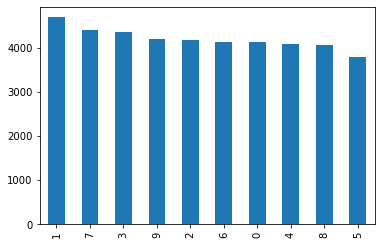

In [4]:
# The 'label' column is separated from the rest in the training set

label = train['label'].to_numpy()
train['label'].value_counts().plot(kind='bar')
train = train.drop(columns=['label']).to_numpy()
test = test.to_numpy()

# The reshaping is important as need to put it in form of an image of dimension 28x28.
# The extra 1 denotes it is an gray scale image. For an RGB image it would be 3
train=np.reshape(train,(42000,28,28,1))
test=np.reshape(test,(28000,28,28,1))

The plot above shows the occurence of each of the digits in the training set. 

There is not much of a difference between frequency of each of the digit. So, the dataset can be assumed to be not skewed and therefore good.

### Data Visualization:

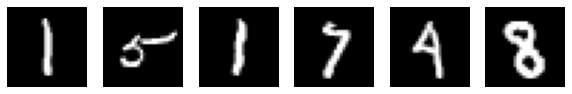

In [5]:
#Visualizing few random digits from the training set

fig=plt.figure(figsize=(10, 4))
columns = 6
rows = 1
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    img1 = train[i+1000]
    plt.imshow(np.squeeze(img1,axis=2), cmap="gray")

### Data Preprocessing:

##### Normalizing:
This is a very important step in any image or feature based classification. 
Without normalisation of data some features get much more importance to others leading to lower accuracy compared to when normalized.

There are generally 2 very popular ways of normalizing:

i) Dividing the values with the maximum value that can occur (for gray scale it is 255) --

      This will lead values from 0 to 1
      
ii) Subtracting the mean of the values and then dividing it with the standard deviation --

      This will lead values from -1 to 1

In [6]:
#Here I have used the second method, the first method is equally applicable:

meu = train.mean()
sig = train.std()
train = (train - meu)/sig

meu = test.mean()
sig = test.std()
test = (test - meu)/sig

##### One-Hot encoding:

It is popular way to categorising data and is widely used whenever we do classification for more than 2 classes but is equally appliable for binary(2 class) classification as well.

A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the n-th digit will be represented as a vector which is 1 in the n-th dimension.

In this problem, since we classify 10 digits(0 to 9) we have 10:

For example, 3 would be represented as [0,0,0,1,0,0,0,0,0,0] 

In [7]:
print("Labels before one-hot encoding:")
print(label[5:8])
print("Labels after one-hot encoding:")
print(to_categorical(label)[5:8])

label = to_categorical(label)

Labels before one-hot encoding:
[0 7 3]
Labels after one-hot encoding:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [8]:
# Spilitting the training set to get validation results

X_train, X_val, Y_train, Y_val = train_test_split(train, label, test_size=0.1, random_state=0)

## Modelling the CNN:

##### Design idea:

Designing a CNN is a very important step towards classification result.

A common practice in CNN is "Increase the Dimension - Reduce the size"

Here, dimension is the number of channels. Initially it was 1(gray-scale), after first Convolution I am making it 32 and then I am making it 64

##### Placing Layers:

A CNN architecture always looks like a repeatation of Convolution-Activation-Pooling Combination followed by Dense and Dropout(optional) layers for the final classification.

##### Choosing values:

The choice of loss function is very important. In this question, since I am performing categorisation I will be choosing "categorical_cross entropy". There are many more options which have there special uses.

The activation of the final layer is chosen as "Softmax" since we break it into 10 categories(with each having its own prediction). If the output layer had only 1 neuron then "Softmax" is irrelavant. (You can try training and see the results)

In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               819712    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [10]:
model.fit(X_train,Y_train, epochs=10, validation_data=(X_val,Y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 9s 230us/sample - loss: 0.1205 - accuracy: 0.9629 - val_loss: 0.0608 - val_accuracy: 0.9802
Epoch 2/10
37800/37800 [==============================] - 5s 124us/sample - loss: 0.0424 - accuracy: 0.9865 - val_loss: 0.0557 - val_accuracy: 0.9814
Epoch 3/10
37800/37800 [==============================] - 5s 128us/sample - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0802 - val_accuracy: 0.9779
Epoch 4/10
37800/37800 [==============================] - 5s 125us/sample - loss: 0.0186 - accuracy: 0.9939 - val_loss: 0.0601 - val_accuracy: 0.9855
Epoch 5/10
37800/37800 [==============================] - 5s 121us/sample - loss: 0.0159 - accuracy: 0.9942 - val_loss: 0.0458 - val_accuracy: 0.9890
Epoch 6/10
37800/37800 [==============================] - 5s 120us/sample - loss: 0.0151 - accuracy: 0.9947 - val_loss: 0.0458 - val_accuracy: 0.9871
Epoch 7/10
37800/37800 [===========================

In [11]:
result = model.evaluate(X_val, Y_val, batch_size = 32)
print("Loss on validation: %f \nAccuracy on validation: %f " %(result[0] ,result[1]*100))

4200/4200 [==============================] - 0s 79us/sample - loss: 0.0547 - accuracy: 0.9888
Loss on validation: 0.054666 
Accuracy on validation: 98.880953 


### Visualising the output:

Let us check the Confusion Matrix which will give us the idea of the predictions.

Text(33.0, 0.5, 'actual value')

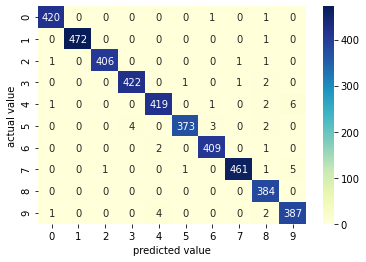

In [12]:
ylabel = model.predict_classes(X_val)
ytest = [np.argmax(y, axis=None, out=None) for y in Y_val]
conf_matrix = confusion_matrix(ytest, ylabel)
sns.heatmap(conf_matrix, cmap="YlGnBu",annot=True, fmt='g')
plt.xlabel('predicted value')
plt.ylabel('actual value')

##### Displaying some of the predictions:

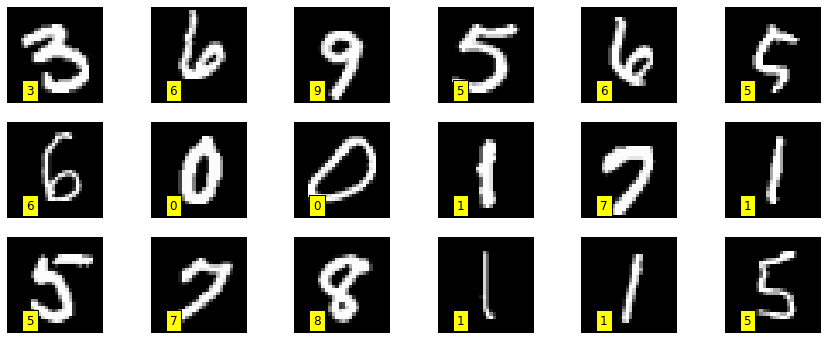

In [13]:
#Displaying the picture along with the predictions

fig=plt.figure(figsize=(15, 6))
columns = 6
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    img1 = X_val[i]
    value ='%1.0f'%(ylabel[i])
    plt.text(5, 25,value,color='black',fontsize=12,bbox=dict(facecolor='yellow'))
    plt.imshow(np.squeeze(img1,axis=2), cmap="gray")

### Checking some mis-classifications:

As most of the results are correct let us check some incorrect predictions that were being made and we might be able to figure out the reason.


[52, 115, 216, 601, 616, 665, 707, 830, 845, 856, 992, 1087, 1109, 1146, 1152, 1171, 1182, 1190, 1324, 1340, 1532, 1586, 1657, 1788, 1835, 1938, 2050, 2060, 2156, 2223, 2252, 2492, 2542, 2636, 2651, 2706, 2854, 3001, 3207, 3252, 3370, 3433, 3455, 3997, 4033, 4091, 4193]


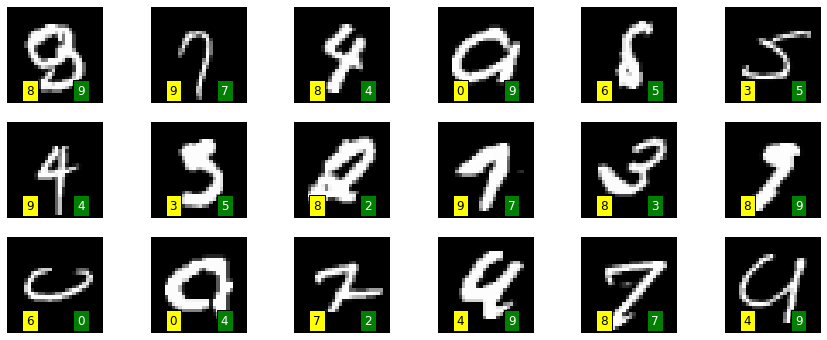

In [14]:
# Let me print both the prediction and the actual values on 
# the images which will help in better visualisation

y_mis = [i for i in range(len(ytest)) if ytest[i]!=ylabel[i]]
print(y_mis) #indices of the mis-classifications

fig=plt.figure(figsize=(15, 6))
columns = 6
rows = 3
x=0
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    img1 = X_val[y_mis[x]]
    predicted_value ='%1.0f'%(ylabel[y_mis[x]])
    plt.text(5, 25,predicted_value,color='black',fontsize=12,bbox=dict(facecolor='yellow'))
    actual_value ='%1.0f'%(ytest[y_mis[x]])
    plt.text(20, 25,actual_value,color='white',fontsize=12,bbox=dict(facecolor='green'))
    plt.imshow(np.squeeze(img1,axis=2), cmap="gray")
    x=x+1

As we can see above that the mis-classifications are very debatable as they could have been predicted either ways even with human eyes.

### Visualising Convolution Layers:

Let us see how the Convolution layers work to produce a classification

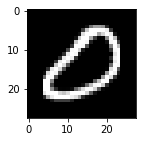

Output for each filter of first Convolution Layer


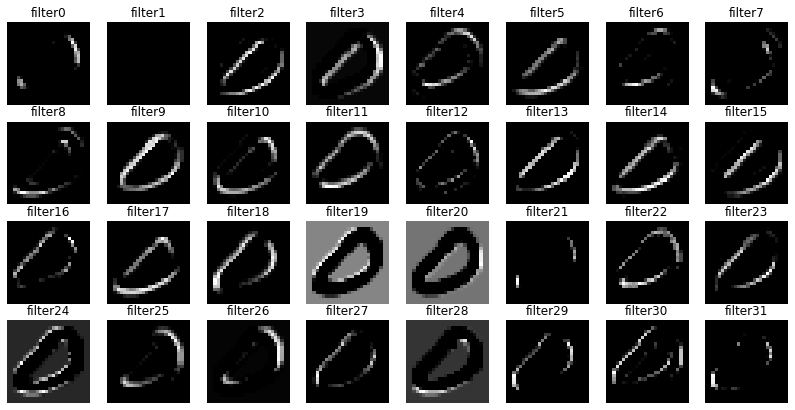

Output for each filter of second Convolution Layer


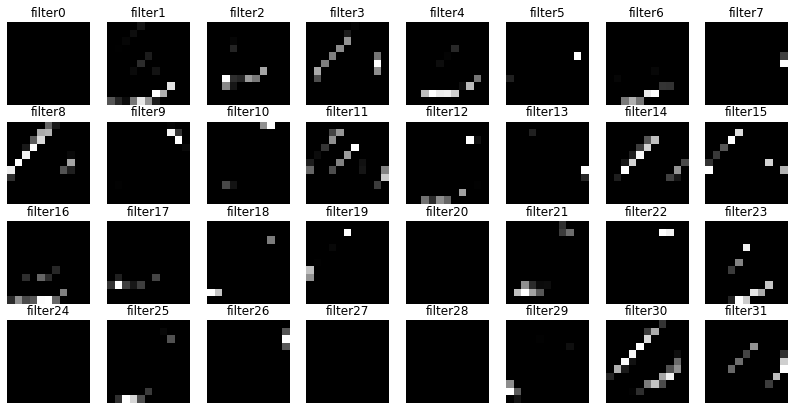

In [15]:
img=X_val[8]
fig=plt.figure(figsize=(2,2))
plt.imshow(np.squeeze(img,axis=2), cmap="gray")
plt.show()

img = np.expand_dims(img, axis=0)
conv1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
conv2_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
conv1_features = conv1_output.predict(img)
conv2_features = conv2_output.predict(img)

import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4

print("Output for each filter of first Convolution Layer")
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv1_features[0, :, :, i], cmap='gray')
plt.show()

fig=plt.figure(figsize=(14,7))
print("Output for each filter of second Convolution Layer")
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2_features[0, :, :, i], cmap='gray')
plt.show()

#### Inference from above output:

It can be seen that the first layer of convolution observes edge features or backgroud or sudden changes that can be obtained by certain well known image-processing convolution kernels such as sobel or laplacian. 

However, the second convolution layer observes edges and corners which cannot be explained very well. And this is true if we go even further the convolution output cannot be explained but they capture relevant feature which makes CNN very useful for image classification

### Submitting Predictions to Kaggle:

In [16]:
answers = model.predict_classes(test, verbose=0)
submissions=pd.DataFrame({"ImageId": list(range(1,len(answers)+1)),"Label": answers})
submissions.to_csv("submission.csv", index=False, header=True)

Thankyou for reading till the end. If it has helped you understand Convolution please concider upvoting. Thankyou.